In [1]:
# IMPORT 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# data set load
df= pd.read_csv(r"F:\Drive\ExcelR\Assignments\EDA2\EDA2\adult_with_headers.csv")

# Task

## 1. Data Exploration and Preprocessing:
    •	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
    •	Handle missing values as per the best practices (imputation, removal, etc.).
    •	Apply scaling techniques to numerical features:
        •	Standard Scaling
        •	Min-Max Scaling
    •	Discuss the scenarios where each scaling technique is preferred and why.


In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaling =MinMaxScaler()

In [8]:
scaling.fit_transform(df[['age','fnlwgt','education_num','capital_gain', 'capital_loss', 'hours_per_week']])

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [9]:
scaling_std=StandardScaler()
scaling_std.fit_transform(df[['age','fnlwgt','education_num','capital_gain', 'capital_loss', 'hours_per_week']])

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

### Standard Scaling vs. Min-Max Scaling

#### **Standard Scaling**

**Preferred Scenarios:**
- **Machine Learning Algorithms That Assume Normality:** Standard Scaling is ideal when the algorithm assumes that the data is normally distributed (e.g., linear regression, logistic regression, and algorithms based on distance metrics like k-NN, SVM). It scales features to have a mean of 0 and a standard deviation of 1.
- **When Dealing with Outliers:** Standard Scaling is less sensitive to outliers than Min-Max Scaling because it focuses on the mean and standard deviation of the data rather than the absolute minimum and maximum values.
- **When Data Has Varying Scales:** If different features in the dataset have significantly different scales, Standard Scaling brings them to a common scale, making the model training process more stable and faster.

**Why Use It:**
- Ensures that all features contribute equally to the model, preventing features with larger scales from dominating.
- Helps improve the convergence speed of gradient descent-based algorithms.

#### **Min-Max Scaling**

**Preferred Scenarios:**
- **Algorithms That Don’t Assume Normality:** Min-Max Scaling is ideal for algorithms that do not assume a normal distribution of data (e.g., neural networks, k-means clustering). It scales the data to a fixed range, typically [0, 1], which can be advantageous for algorithms like neural networks that benefit from normalized inputs.
- **When Data Has a Known Minimum and Maximum:** If the features have a well-defined range and outliers are not a concern, Min-Max Scaling is appropriate. It ensures that all features are on the same scale, which can be beneficial for algorithms sensitive to the absolute scale of input data.
- **Visualization and Interpretability:** Min-Max Scaling is useful when you need to visualize or interpret the scaled data within a specific range, such as [0, 1], for easier comparison across different features.

**Why Use It:**
- Preserves the relationships between the original data points, which can be important for maintaining the distribution's integrity.
- Ensures that the data is within a range that is compatible with the input requirements of certain models, particularly those where all inputs must be positive.

#### **Summary**
- **Standard Scaling** is preferred when working with algorithms that assume normally distributed data or when you need to mitigate the impact of outliers.
- **Min-Max Scaling** is ideal when the data needs to be scaled to a specific range, particularly for algorithms that are sensitive to the absolute scale of features.


## 2. Encoding Techniques:
    •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
    •	Use Label Encoding for categorical variables with more than 5 categories.
    •	Discuss the pros and cons of One-Hot Encoding and Label Encoding


### One-Hot encoding

In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [13]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [14]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
ohe=OneHotEncoder()

In [16]:
ohe.fit_transform(df[['sex','income','race']]).toarray()

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [17]:
features_array=ohe.fit_transform(df[['sex','income','race']]).toarray()

In [18]:
ohe.categories_

[array([' Female', ' Male'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object),
 array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object)]

In [19]:
feature_catagory=ohe.categories_

In [20]:
np.concatenate(feature_catagory)

array([' Female', ' Male', ' <=50K', ' >50K', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White'], dtype=object)

In [21]:
feature_catagory=np.concatenate(feature_catagory)

In [22]:
print(feature_catagory)

[' Female' ' Male' ' <=50K' ' >50K' ' Amer-Indian-Eskimo'
 ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [23]:
pd.DataFrame(features_array,columns=feature_catagory)

,Female,Male,<=50K,>50K,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32558,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32559,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
features=pd.DataFrame(features_array,columns=feature_catagory)

In [25]:
print(features)

       Female  Male  <=50K  >50K  Amer-Indian-Eskimo  Asian-Pac-Islander  \
0         0.0   1.0    1.0   0.0                 0.0                 0.0   
1         0.0   1.0    1.0   0.0                 0.0                 0.0   
2         0.0   1.0    1.0   0.0                 0.0                 0.0   
3         0.0   1.0    1.0   0.0                 0.0                 0.0   
4         1.0   0.0    1.0   0.0                 0.0                 0.0   
...       ...   ...    ...   ...                 ...                 ...   
32556     1.0   0.0    1.0   0.0                 0.0                 0.0   
32557     0.0   1.0    0.0   1.0                 0.0                 0.0   
32558     1.0   0.0    1.0   0.0                 0.0                 0.0   
32559     0.0   1.0    1.0   0.0                 0.0                 0.0   
32560     1.0   0.0    0.0   1.0                 0.0                 0.0   

       Black  Other  White  
0        0.0    0.0    1.0  
1        0.0    0.0    1.0  


In [26]:
features.head()

,Female,Male,<=50K,>50K,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
features.tail()

,Female,Male,<=50K,>50K,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
32556,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32558,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32559,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32560,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Label encoding 

In [28]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [30]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [31]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [32]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [33]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [35]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
# Apply Label Encoding only to columns with more than 5 unique categories
for column in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']:
    if df[column].nunique() > 5:
        df[column] = le.fit_transform(df[column])

In [39]:
print(df)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship    race      sex  capital_gain  capital_loss  \
0               1  

In [40]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K


In [41]:
#  columns with more than 5 unique categories
for column in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']:
    if df[column].nunique() > 5:
        print(column ," : ",df[column].unique())

workclass  :  [7 6 4 1 2 0 5 8 3]
education  :  [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital_status  :  [4 2 0 3 5 1 6]
occupation  :  [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
relationship  :  [1 0 5 3 4 2]
native_country  :  [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]


### One-Hot Encoding vs. Label Encoding

#### **One-Hot Encoding**

**Pros:**
- **Non-Ordinal Representation:** It treats all categories as independent and does not impose any ordinal relationship, making it suitable for nominal data.
- **No Assumptions About Order:** Since each category is represented by a separate binary feature, there is no implicit order or hierarchy.
- **Compatible with Most Algorithms:** Many machine learning algorithms (like linear models and tree-based methods) perform well with One-Hot encoded data, as they treat the features independently.

**Cons:**
- **High Dimensionality:** For categorical variables with many unique values, One-Hot Encoding can result in a significant increase in the number of features, leading to a "curse of dimensionality."
- **Memory Inefficiency:** The sparse matrix created by One-Hot Encoding can consume a lot of memory, especially in large datasets with high-cardinality features.
- **Computational Cost:** The increase in dimensionality can also lead to longer training times and greater computational resources being required.

#### **Label Encoding**

**Pros:**
- **Low Dimensionality:** Label Encoding does not increase the dimensionality of the dataset; each category is represented by a single integer, making it more memory-efficient.
- **Simplicity:** It's easy to implement and understand, and it works well when the categorical variable is ordinal, i.e., when there is a meaningful order among categories.
- **Faster Computation:** With fewer features, models can train faster and require less computational power compared to One-Hot Encoding.

**Cons:**
- **Implicit Ordinality:** Label Encoding introduces an ordinal relationship between categories, which may not exist, leading to misleading results when used with algorithms that assume a natural ordering (e.g., linear models).
- **Not Suitable for Nominal Data:** For purely nominal categories (e.g., 'red', 'blue', 'green'), the numeric labels can mislead algorithms into thinking there's a relationship between these values.

#### **Summary**
- Use **One-Hot Encoding** when dealing with nominal categorical variables, especially when the number of unique categories is small, to avoid introducing a false ordinal relationship.
- Use **Label Encoding** for ordinal categorical variables or when working with algorithms that can handle ordinal data appropriately. It's also useful when dealing with high-cardinality categorical variables to prevent high dimensionality.



## 3.Feature Engineering:
    •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
    •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [42]:
# Create interaction feature
df['Product_education_and_occupation'] = df['education' ] * df['occupation']

df['capital_gain_and_loss'] = df['capital_gain' ] - df['capital_loss']

# Display the DataFrame with the new features
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Product_education_and_occupation,capital_gain_and_loss
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K,9,2174
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K,36,0
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K,66,0
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K,6,0
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K,90,0


# Aggregate feature: can't be used as there is no feature to add or have multiple values depending on time to add.


### Rationale behind choices:

 - **Interaction Features:** Help models capture non-linear relationships between variables.
 - **Aggregated Features:** Provide summary statistics that can represent broader trends or behaviors, making the model more robust and informative.
- These features can add significant value, particularly if the original features are not strongly correlated with the target variable on their own.

In [43]:
# Check skewness
skewness_bf = df['age'].skew()
skewness_bf


0.5587433694130484

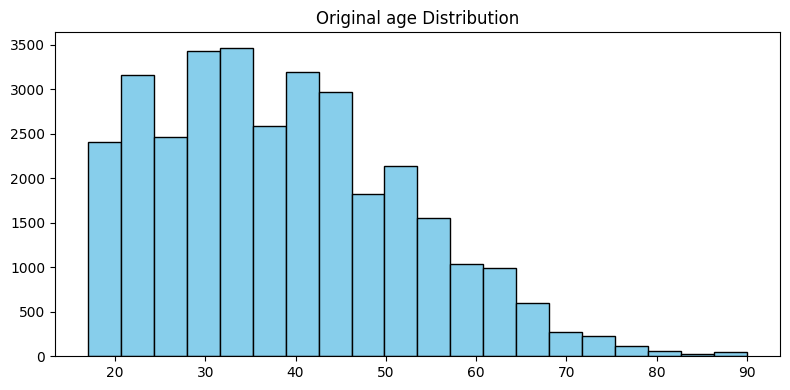

In [44]:
# Plot original distribution
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original age Distribution')
plt.tight_layout()
plt.show()

In [45]:
# Apply log transformation
df['age'] = np.log1p(df['age']) #adding 1 to avoid log(0)

In [46]:
# Check skewness after transformation
skewness_af = df['age'].skew()
skewness_af

-0.11334149286035627

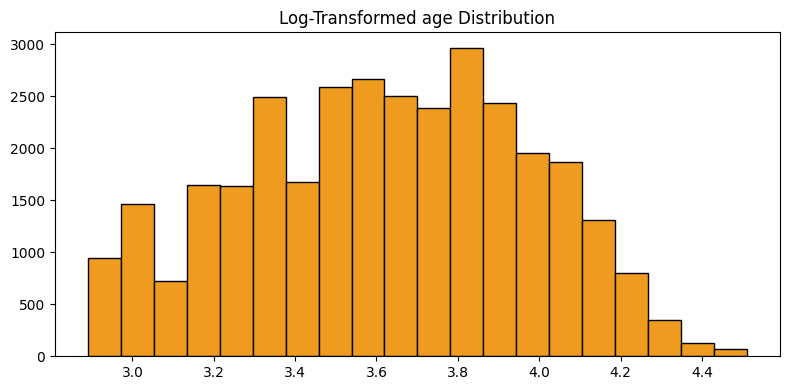

In [47]:
# Plot transformed distribution
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=20, color='#ef9b20', edgecolor='black')
plt.title('Log-Transformed age Distribution')
plt.tight_layout()
plt.show()

## 4. Feature Selection:
    ● Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
    ● Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [48]:
from sklearn.ensemble import IsolationForest

In [49]:
# Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)

In [50]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'Product_education_and_occupation', 'capital_gain_and_loss'],
      dtype='object')

In [51]:
# Fit the model and predict outliers 
df['Outlier'] = isolation_forest.fit_predict(df[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                                                 'marital_status', 'occupation', 'relationship','capital_gain',
                                                 'capital_loss', 'hours_per_week', 'native_country',
                                                 'Product_education_and_occupation', 'capital_gain_and_loss']]) # 1 for inliers, -1 for outliers
df['Outlier']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    1
32558    1
32559    1
32560   -1
Name: Outlier, Length: 32561, dtype: int32

## Outliers can impact model performance by:

    - Distorting Model Parameters: In linear models, outliers can skew parameters like slopes, leading to a poor fit and inaccurate predictions.

    - Reducing Accuracy: Outliers can cause the model to perform poorly on both training and unseen data, lowering overall accuracy.

    - Misleading Metrics: Outliers can inflate error metrics like MSE and MAE, giving a false sense of poor model performance.

    - Feature Scaling Issues: Outliers can disrupt normalization or standardization, affecting algorithms that rely on distance measures, like k-NN and SVM.

In [56]:
!pip install ppscore --user

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2517 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\p

## Explanation: Difficulty in Using ppscore for Predictive Power Score Analysis
Problem Description
I have encountered issues installing ppscore and downgrading pandas to a compatible version. Specifically, the installation of ppscore fails due to errors in building the required version of pandas. Additionally, attempts to downgrade pandas have also resulted in similar build errors. These issues prevent me from using ppscore for the analysis as required.

Installation Errors
The errors encountered are as follows:

**Installation of ppscore:** The installation process fails while trying to build pandas, leading to errors in wheel construction.
**Downgrading pandas:** Attempts to downgrade pandas result in errors similar to those encountered during the ppscore installation

### I tried all methods to install ppscore i am unable to install it 